## 章節 4：更多的估計

### 4.6 討論

這章節我們用不同的先驗分佈解決相同的歐元問題。並且在大量資料後，先驗分佈最後被淹沒了（演變成相似的後驗分佈）。如果兩個人用不同的先驗分佈起始，當有足夠資料的情況下，最後的後驗分佈會收斂。在某些情況兩個分佈的差異足夠小到對實際上沒有影響。

當上述的情況發生，多少減輕上一章節說到的先驗分佈主客觀性的擔憂。大多數真實是意見的問題，即使很不一樣的先驗機率最終還是被看到的資料所收斂。

但這不都是會發生。首先，記得貝葉斯分析是基於模型的決策。如果你跟我選不同的模型，我們可能會用不同的方式解釋資料。所以既使相同的資料，我們用不同的似然性函數，最後我們的後驗分佈可能不會收斂至相似的分佈。

同時提醒貝葉斯更新，我們對每個先驗機率乘上一個似然性，所以如果 p(H)=0，則後驗機率 p(H|D)=0，不論看到什麼 D。

歐元問題中，如果你相信 x （出現正面的機率）是小於 50%的，你可以將其他的假設(x >= 50%)設定為 0。那將沒有資料會讓你信服（請參考下格的程式碼）。

這個觀察是[Crowell's 規則](http://en.wikipedia.org/wiki/Cromwell's_rule)的基礎，它建議你應該在先驗分佈中避免任何假設為 0，即使某些假設幾乎不可能。

Cromwell's 規則是命名自 Oliver Cromwell，他寫到「I beseech you, in the bowels of Christ, think it possible that you may be mistaken.」。 對貝葉斯派別來說，事實證明是個好建議（即使有點過分）。

先驗分佈


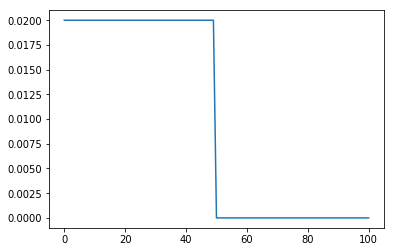

後驗分佈


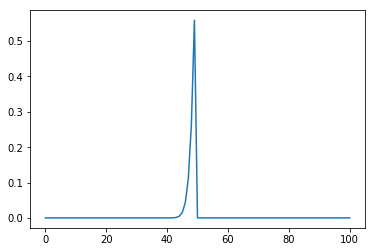

最大似然性： 49


In [13]:
from thinkbayes import Suite, Percentile
import matplotlib.pyplot as plt

class Euro_Uniform(Suite):
    
    
    def __init__(self, hypos):
        super().__init__()
        for hypo in hypos:
            if hypo < 50: # 將 >= 50 的假設設為 0
                self.Set(hypo, 1)
            else:
                self.Set(hypo, 0)
        
        self.Normalize()
    
    def Likelihood(self, data, hypo):
        if data == 'H':
            return hypo/100.0
    
        return 1-hypo/100.0
    

def plot_suite(suite):
    x, y = zip(*sorted(suite.Items()))
    plt.plot(x, y)
    plt.show()
        
def update_distribution(suite, dataset):
    for data in dataset:
        suite.Update(data)

hypos = range(101)
print("先驗分佈")
suite1 = Euro_Uniform(hypos)
plot_suite(suite1)

head, tail = 140, 110 # 依據問題出現 140 次正面、110次反面
dataset = 'H' * head + 'T' * tail # 觀察到的資料，不考慮順序
print("後驗分佈")
update_distribution(suite1, dataset)

plot_suite(suite1)
print("最大似然性：", suite1.MaximumLikelihood())

即使之前小節計算最大的後驗分佈是在 56 ，但是由於先驗分佈在 x >= 50 的假設下就沒有機率了，所以後驗分佈的最大似然性落在 x=49。

因此不同的先驗分佈還是會導致不同的後驗分佈。